In [2]:
import sklearn
from sklearn.datasets import load_digits 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import random

In [3]:
# load digits data set
digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [4]:
def euclidean_distance(A, B):
    #returns matrix D_ij where i is the ith instance of matrix A and j is the jth instance of matrix B
    #so D_ij is the euclidean distance between those two instances
    return np.sqrt(np.sum(np.square(A[:,None]-B),axis=2))

def sorted_euclidean_dist(A, B):
    return np.argsort(euclidean_distance(A, B), axis = 1)

In [5]:
# 1797x1797 matrix that contains TP_i(m) in TP[i][m]
TP = np.dot(np.equal((target + np.zeros(len(target)**2).reshape(len(target),len(target))).T,target[sorted_euclidean_dist(data,data)]),np.triu([1]*len(target)))
TP.shape

(1797, 1797)

In [6]:
# 1797x1797 matrix that contains FP_i(m) in FP[i][m]
FP = np.dot(np.not_equal((target + np.zeros(len(target)**2).reshape(len(target),len(target))).T,target[sorted_euclidean_dist(data,data)]),np.triu([1]*len(target)))
FP.shape

(1797, 1797)

In [7]:
# 1797x1797 matrix with N_i in each element of row i
#define N_matrix via last column of TP
N_matrix = (TP[:,len(TP)-1] + np.zeros(len(target)**2).reshape(len(target),len(target))).T

In [8]:
precision = TP/(TP + FP)
recall = TP/N_matrix

In [9]:
def mean_precision_recall(k):
    precision_k = precision[np.where(target == k)]
    recall_k = recall[np.where(target == k)]
    return np.mean(precision_k,axis = 0), np.mean(recall_k,axis = 0)

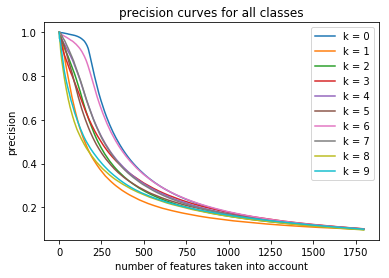

AOC of k = 0: 577.25
AOC of k = 1: 401.16
AOC of k = 2: 470.94
AOC of k = 3: 496.15
AOC of k = 4: 505.11
AOC of k = 5: 471.01
AOC of k = 6: 565.31
AOC of k = 7: 501.67
AOC of k = 8: 417.37
AOC of k = 9: 433.84


In [26]:
#precision plots
plt.title("precision curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('precision')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall(k)[0], label = 'k = %i'%k)
    plt.legend()
plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall(k)[0], x = np.arange(1,1798))))

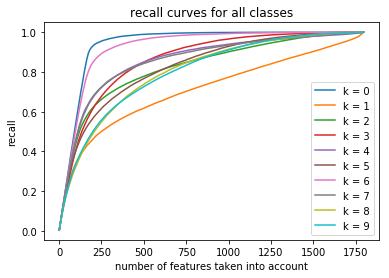

AOC of k = 0: 1692.74
AOC of k = 1: 1277.56
AOC of k = 2: 1483.62
AOC of k = 3: 1550.75
AOC of k = 4: 1543.07
AOC of k = 5: 1485.14
AOC of k = 6: 1663.76
AOC of k = 7: 1539.88
AOC of k = 8: 1443.43
AOC of k = 9: 1441.04


In [27]:
#recall plots
plt.title("recall curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('recall')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall(k)[1], label = 'k = %i'%k)
    plt.legend()

plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall(k)[1], x = np.arange(1,1798))))

In [33]:
precisionGain = (np.ones(len(data))*len(data)/N_matrix - 1/precision) / ((np.ones(len(data))*len(data)/N_matrix)-1)
precisionGain[precisionGain < 0] = 0
recallGain = (np.ones(len(data))*len(data)/N_matrix - 1/recall) / ((np.ones(len(data))*len(data)/N_matrix)-1)
recallGain[recallGain < 0] = 0

In [35]:
def mean_precision_recall_Gain(k):
    precision_k = precisionGain[np.where(target == k)]
    recall_k = recallGain[np.where(target == k)]
    return np.mean(precision_k,axis = 0), np.mean(recall_k,axis = 0)

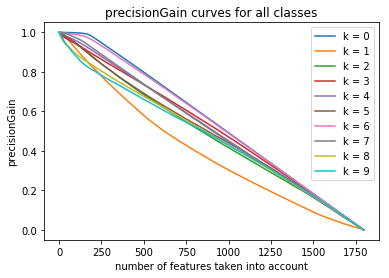

AOC of k = 0: 982.76
AOC of k = 1: 716.86
AOC of k = 2: 864.82
AOC of k = 3: 923.19
AOC of k = 4: 912.14
AOC of k = 5: 883.46
AOC of k = 6: 973.72
AOC of k = 7: 913.12
AOC of k = 8: 856.40
AOC of k = 9: 846.28


In [37]:
#precisionGain plots
plt.title("precisionGain curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('precisionGain')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall_Gain(k)[0], label = 'k = %i'%k)
    plt.legend()
plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall_Gain(k)[0], x = np.arange(1,1798))))

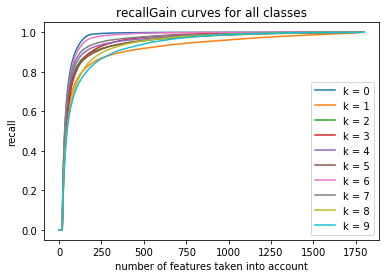

AOC of k = 0: 1749.24
AOC of k = 1: 1648.41
AOC of k = 2: 1699.87
AOC of k = 3: 1709.89
AOC of k = 4: 1710.47
AOC of k = 5: 1700.14
AOC of k = 6: 1741.55
AOC of k = 7: 1721.22
AOC of k = 8: 1685.01
AOC of k = 9: 1670.04


In [38]:
#recall plots
plt.title("recallGain curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('recall')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall_Gain(k)[1], label = 'k = %i'%k)
    plt.legend()

plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall_Gain(k)[1], x = np.arange(1,1798))))